In [1]:
import torch
from torch import nn

In [2]:
import os
import pandas as pd

data = pd.read_csv("data/eng2french.csv")

In [3]:
from d2l import torch as d2l

In [7]:
gpu = False
if torch.cuda.is_available():
    device = torch.device("cuda")
    gpu = True
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU is not available")

GPU is available


In [8]:
data.values

array([['Hi.', 'Salut!'],
       ['Run!', 'Cours\u202f!'],
       ['Run!', 'Courez\u202f!'],
       ...,
       ["Death is something that we're often discouraged to talk about or even think about, but I've realized that preparing for death is one of the most empowering things you can do. Thinking about death clarifies your life.",
        "La mort est une chose qu'on nous décourage souvent de discuter ou même de penser mais j'ai pris conscience que se préparer à la mort est l'une des choses que nous puissions faire qui nous investit le plus de responsabilité. Réfléchir à la mort clarifie notre vie."],
       ['Since there are usually multiple websites on any given topic, I usually just click the back button when I arrive on any webpage that has pop-up advertising. I just go to the next page found by Google and hope for something less irritating.',
        "Puisqu'il y a de multiples sites web sur chaque sujet, je clique d'habitude sur le bouton retour arrière lorsque j'atterris sur n'i

In [9]:
english_sentences = data["English words/sentences"].tolist()
french_sentences = data["French words/sentences"].tolist()
english_sentences, french_sentences

(['Hi.',
  'Run!',
  'Run!',
  'Who?',
  'Wow!',
  'Fire!',
  'Help!',
  'Jump.',
  'Stop!',
  'Stop!',
  'Stop!',
  'Wait!',
  'Wait!',
  'Go on.',
  'Go on.',
  'Go on.',
  'Hello!',
  'Hello!',
  'I see.',
  'I try.',
  'I won!',
  'I won!',
  'I won.',
  'Oh no!',
  'Attack!',
  'Attack!',
  'Cheers!',
  'Cheers!',
  'Cheers!',
  'Cheers!',
  'Get up.',
  'Go now.',
  'Go now.',
  'Go now.',
  'Got it!',
  'Got it!',
  'Got it?',
  'Got it?',
  'Got it?',
  'Hop in.',
  'Hop in.',
  'Hug me.',
  'Hug me.',
  'I fell.',
  'I fell.',
  'I know.',
  'I left.',
  'I left.',
  'I lied.',
  'I lost.',
  'I paid.',
  "I'm 19.",
  "I'm OK.",
  "I'm OK.",
  'Listen.',
  'No way!',
  'No way!',
  'No way!',
  'No way!',
  'No way!',
  'No way!',
  'No way!',
  'No way!',
  'No way!',
  'Really?',
  'Really?',
  'Really?',
  'Thanks.',
  'We try.',
  'We won.',
  'We won.',
  'We won.',
  'We won.',
  'Ask Tom.',
  'Awesome!',
  'Be calm.',
  'Be calm.',
  'Be calm.',
  'Be cool.',
  'Be fair

In [10]:
def add_spaces_before_punctuation(text):
    result = ""
    text = text.lower()
    for i in range(len(text)):
        if text[i] in [',', '.', '?', '!']:
            if i > 0 and text[i-1] not in [' ', '\t']:
                result += ' ' + text[i]
            else:
                result += text[i]
        else:
            result += text[i]
    return result
# 在标点前增加空格，删除编码错误的字符
def clearText(sentences):
    res = []
    for sentence in sentences:
        res.append(add_spaces_before_punctuation(sentence))
    return res

In [11]:
clear_eng_sentences = clearText(english_sentences)
clear_fr_sentences = clearText(french_sentences)

In [12]:
clear_eng_sentences

['hi .',
 'run !',
 'run !',
 'who ?',
 'wow !',
 'fire !',
 'help !',
 'jump .',
 'stop !',
 'stop !',
 'stop !',
 'wait !',
 'wait !',
 'go on .',
 'go on .',
 'go on .',
 'hello !',
 'hello !',
 'i see .',
 'i try .',
 'i won !',
 'i won !',
 'i won .',
 'oh no !',
 'attack !',
 'attack !',
 'cheers !',
 'cheers !',
 'cheers !',
 'cheers !',
 'get up .',
 'go now .',
 'go now .',
 'go now .',
 'got it !',
 'got it !',
 'got it ?',
 'got it ?',
 'got it ?',
 'hop in .',
 'hop in .',
 'hug me .',
 'hug me .',
 'i fell .',
 'i fell .',
 'i know .',
 'i left .',
 'i left .',
 'i lied .',
 'i lost .',
 'i paid .',
 "i'm 19 .",
 "i'm ok .",
 "i'm ok .",
 'listen .',
 'no way !',
 'no way !',
 'no way !',
 'no way !',
 'no way !',
 'no way !',
 'no way !',
 'no way !',
 'no way !',
 'really ?',
 'really ?',
 'really ?',
 'thanks .',
 'we try .',
 'we won .',
 'we won .',
 'we won .',
 'we won .',
 'ask tom .',
 'awesome !',
 'be calm .',
 'be calm .',
 'be calm .',
 'be cool .',
 'be fair 

In [13]:
clear_fr_sentences

['salut !',
 'cours\u202f !',
 'courez\u202f !',
 'qui ?',
 'ça alors\u202f !',
 'au feu !',
 "à l'aide\u202f !",
 'saute .',
 'ça suffit\u202f !',
 'stop\u202f !',
 'arrête-toi !',
 'attends !',
 'attendez !',
 'poursuis .',
 'continuez .',
 'poursuivez .',
 'bonjour !',
 'salut !',
 'je comprends .',
 "j'essaye .",
 "j'ai gagné !",
 "je l'ai emporté !",
 'j’ai gagné .',
 'oh non !',
 'attaque !',
 'attaquez !',
 'santé !',
 'à votre santé !',
 'merci !',
 'tchin-tchin !',
 'lève-toi .',
 'va , maintenant .',
 'allez-y maintenant .',
 'vas-y maintenant .',
 "j'ai pigé !",
 'compris !',
 'pigé\u202f ?',
 'compris\u202f ?',
 "t'as capté\u202f ?",
 'monte .',
 'montez .',
 'serre-moi dans tes bras !',
 'serrez-moi dans vos bras !',
 'je suis tombée .',
 'je suis tombé .',
 'je sais .',
 'je suis parti .',
 'je suis partie .',
 "j'ai menti .",
 "j'ai perdu .",
 'j’ai payé .',
 "j'ai 19 ans .",
 'je vais bien .',
 'ça va .',
 'écoutez !',
 "c'est pas possible\u202f !",
 'impossible\u202f !

In [14]:
class Vocab:
    def __init__(self, name):
        self.name = name
        self.w2i = {"<EOS>":0, "<SOS>":1, "<UNK>":2}
        self.i2w = {0:"<EOS>", 1:"<SOS>", 2:"<UNK>"}
        self.vocab_size = 3
    
    def build(self, sentences):
        word_count_map = {"<EOS>":0, "<SOS>":1, "<UNK>":2}
        for sentence in sentences:
            words = sentence.split()
            for word in words:
                if word in word_count_map:
                    word_count_map[word] += 1
                else:
                    word_count_map[word] = 1
        
        word_list = [key for key, value in word_count_map.items() if value != 1]
        self.vocab_size = len(word_list) + 3
        for i, word in enumerate(word_list):
            self.w2i[word] = i+3
            self.i2w[i+3] = word

In [15]:
eng_vocab = Vocab("eng")
eng_vocab.build(clear_eng_sentences)

In [16]:
eng_vocab.w2i["go"], eng_vocab.vocab_size

(17, 10169)

In [17]:
fr_vocab = Vocab("fr")
fr_vocab.build(clear_fr_sentences)

In [18]:
fr_vocab.w2i["!"], fr_vocab.vocab_size

(6, 18119)

In [19]:
# 定义一个函数来计算单词数
def count_words(s):
    return len(s.split())

# 找到包含单词数最多的字符串
max_words = 0
max_string = ""
for string in clear_eng_sentences + clear_fr_sentences:
    words = count_words(string)
    if words > max_words:
        max_words = words
        max_string = string

print(f"The string with the most words is '{max_string}' with {max_words} words.")
num_steps = max_words + 2

The string with the most words is 'si quelqu'un qui ne connaît pas vos antécédents dit que vous parlez comme un locuteur natif , cela veut dire qu'il a probablement remarqué quelque chose à propos de votre élocution qui lui a fait prendre conscience que vous n'êtes pas un locuteur natif . en d'autres termes , vous ne parlez pas vraiment comme un locuteur natif .' with 59 words.


In [20]:
def tokenlize_sentences(vocab, sentences):
    tokenlized = None
    valid_len = []
    for sentence in sentences:
        res = torch.zeros(max_words+1, dtype=torch.long) # EOS
        split_sentence = sentence.split()
        valid_len.append(len(split_sentence)+1)
        for i, word in enumerate(split_sentence):
            if word in vocab.w2i:
                res[i] = vocab.w2i[word]
            else:
                res[i] = 2 # UNK
        if tokenlized == None:
            tokenlized = res.unsqueeze(0)
        else:
            tokenlized = torch.cat((tokenlized, res.unsqueeze(0)), dim=0)
    return tokenlized, torch.tensor(valid_len)

In [21]:
#eng_tokenlized, eng_valid_len = tokenlize_sentences(eng_vocab, clear_eng_sentences)
#torch.save(eng_tokenlized, 'data/eng_tokenlized.pt')
#torch.save(eng_valid_len, 'data/eng_valid_len.pt')
eng_tokenlized = torch.load('data/eng_tokenlized.pt')
eng_valid_len = torch.load('data/eng_valid_len.pt')
eng_tokenlized, eng_valid_len

(tensor([[   5,    6,    0,  ...,    0,    0,    0],
         [   7,    8,    0,  ...,    0,    0,    0],
         [   7,    8,    0,  ...,    0,    0,    0],
         ...,
         [2185,  252, 1232,  ...,    0,    0,    0],
         [5810,  717,  399,  ...,    0,    0,    0],
         [1905, 1146,    9,  ...,    0,    0,    0]]),
 tensor([ 3,  3,  3,  ..., 41, 47, 49]))

In [22]:
#fr_tokenlized, fr_valid_len = tokenlize_sentences(fr_vocab, clear_fr_sentences)
#torch.save(fr_tokenlized, 'data/fr_tokenlized.pt')
#torch.save(fr_valid_len, 'data/fr_valid_len.pt')
fr_tokenlized = torch.load('data/fr_tokenlized.pt')
fr_valid_len = torch.load('data/fr_valid_len.pt')
fr_tokenlized, fr_valid_len

(tensor([[    5,     6,     0,  ...,     0,     0,     0],
         [    7,     6,     0,  ...,     0,     0,     0],
         [    8,     6,     0,  ...,     0,     0,     0],
         ...,
         [  146,   414,    87,  ...,     0,     0,     0],
         [15472,   389,   159,  ...,     0,     0,     0],
         [  270,  1741,     9,  ..., 10413,    18,     0]]),
 tensor([ 3,  3,  3,  ..., 50, 53, 60]))

In [23]:
class PositionWiseFFN(nn.Module):
    def __init__(self, ffn_num_input, ffn_num_hiddens, ffn_num_outputs, **kwargs):
        super(PositionWiseFFN, self).__init__(**kwargs)
        self.dense1 = nn.Linear(ffn_num_input, ffn_num_hiddens)
        self.relu = nn.ReLU()
        self.dense2 = nn.Linear(ffn_num_hiddens, ffn_num_outputs)
    
    def forward(self, X):
        X = self.dense1(X)
        X = self.relu(X)
        X = self.dense2(X)
        return X

In [24]:
class AddNorm(nn.Module):
    def __init__(self, normalized_shape, dropout, **kwargs):
        super(AddNorm, self).__init__(**kwargs)
        self.dropout = nn.Dropout(dropout)
        self.ln = nn.LayerNorm(normalized_shape)
    
    def forward(self, X, Y):
        return self.ln(self.dropout(Y) + X)

In [25]:
class EncoderBlock(nn.Module):
    def __init__(self, key_size, query_size, value_size,
                num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens,
                num_heads, dropout, use_bias=False, **kwargs):
        super(EncoderBlock, self).__init__(**kwargs)
        self.attention = d2l.MultiHeadAttention(
            key_size, query_size, value_size, num_hiddens, num_heads, dropout, use_bias)
        self.addnorm1 = AddNorm(norm_shape, dropout)
        self.ffn = PositionWiseFFN(ffn_num_input, ffn_num_hiddens, num_hiddens)
        self.addnorm2 = AddNorm(norm_shape, dropout)
    
    def forward(self, X, valid_lens):
        X = self.addnorm1(X, self.attention(X, X, X, valid_lens))
        return self.addnorm2(X, self.ffn(X))

In [26]:
import math
class TransformerEncoder(nn.Module):
    def __init__(self, vocab_size, key_size, query_size, value_size, 
                num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens, 
                num_heads, num_layers, dropout, use_bias=False, **kwargs):
        super(TransformerEncoder, self).__init__(**kwargs)
        self.num_hiddens = num_hiddens
        self.embedding = nn.Embedding(vocab_size, num_hiddens)
        self.pos_encoding = d2l.PositionalEncoding(num_hiddens, dropout)
        self.blks = nn.Sequential()
        for i in range(num_layers):
            self.blks.add_module(f"block{i}", EncoderBlock(
                key_size, query_size, value_size, num_hiddens, norm_shape,
                ffn_num_input, ffn_num_hiddens, num_heads, dropout, use_bias))
        
    def forward(self, X, valid_lens, *args):
        X = self.pos_encoding(self.embedding(X) * math.sqrt(self.num_hiddens))
        self.attention_weights = [None] * len(self.blks)
        for i, blk in enumerate(self.blks):
            X = blk(X, valid_lens)
            self.attention_weights[i] = blk.attention.attention.attention_weights
        return X

In [27]:
class DecoderBlock(nn.Module):
    def __init__(self, key_size, query_size, value_size, num_hiddens, 
                norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
                 dropout, i, **kwargs):
        super(DecoderBlock, self).__init__(**kwargs)
        self.i = i
        self.attention1 = d2l.MultiHeadAttention(
            key_size, query_size, value_size, num_hiddens, num_heads, dropout)
        self.addnorm1 = AddNorm(norm_shape, dropout)
        self.attention2 = d2l.MultiHeadAttention(
            key_size, query_size, value_size, num_hiddens, num_heads, dropout)
        self.addnorm2 = AddNorm(norm_shape, dropout)
        self.ffn = PositionWiseFFN(ffn_num_input, ffn_num_hiddens, num_hiddens)
        self.addnorm3 = AddNorm(norm_shape, dropout)
    
    def forward(self, X, state):
        enc_outputs, enc_valid_lens = state[0], state[1]
        if state[2][self.i] is None:
            key_values = X
        else:
            key_values = torch.cat((state[2][self.i], X), axis=1)
        state[2][self.i] = key_values
        if self.training:
            batch_size, num_steps, _ = X.shape
            dec_valid_lens = torch.arange(1, num_steps+1, device=X.device).repeat(batch_size, 1)
        else:
            dec_valid_lens = None
        
        X2 = self.attention1(X, key_values, key_values, dec_valid_lens)
        Y = self.addnorm1(X, X2)
        Y2 = self.attention2(Y, enc_outputs, enc_outputs, enc_valid_lens)
        Z = self.addnorm2(Y, Y2)
        return self.addnorm3(Z, self.ffn(Z)), state

In [28]:
class TransformerDecoder(nn.Module):
    def __init__(self, vocab_size, key_size, query_size, value_size, 
                num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens, 
                num_heads, num_layers, dropout, **kwargs):
        super(TransformerDecoder, self).__init__(**kwargs)
        self.num_hiddens = num_hiddens
        self.num_layers = num_layers
        self.embedding = nn.Embedding(vocab_size, num_hiddens)
        self.pos_encoding = d2l.PositionalEncoding(num_hiddens, dropout)
        self.blks = nn.Sequential()
        for i in range(num_layers):
            self.blks.add_module(f"block{i}", 
                                 DecoderBlock(key_size, query_size, value_size, num_hiddens, 
                                         norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
                                             dropout, i))
        self.dense = nn.Linear(num_hiddens, vocab_size)
    
    def init_state(self, enc_outputs, enc_valid_lens, *args):
        return [enc_outputs, enc_valid_lens, [None] * self.num_layers]
    
    def forward(self, X, state):
        X = self.pos_encoding(self.embedding(X) * math.sqrt(self.num_hiddens))
        self._attention_weights = [[None] * len(self.blks) for _ in range(2)]
        for i, blk in enumerate(self.blks):
            X, state = blk(X, state)
            self._attention_weights[0][i] = blk.attention1.attention.attention_weights
            self._attention_weights[1][i] = blk.attention2.attention.attention_weights
        return self.dense(X), state
    
    @property
    def attention_weights(self):
        return self._attention_weights

In [29]:
num_hiddens, num_layers, dropout = 64, 4, 0.1
num_steps = max_words+2
lr, num_epochs = 0.001, 100
ffn_num_input, ffn_num_hiddens, num_heads = 64, 128, 4
key_size, query_size, value_size = 64, 64, 64
norm_shape = [64]
encoder = TransformerEncoder(
    eng_vocab.vocab_size, key_size, query_size, value_size, num_hiddens, 
    norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
    num_layers, dropout
)
decoder = TransformerDecoder(
    fr_vocab.vocab_size, key_size, query_size, value_size, num_hiddens,
    norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
    num_layers, dropout
)

In [30]:
class EncoderDecoder(nn.Module):
    def __init__(self, encoder, decoder, **kwargs):
        super(EncoderDecoder, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, enc_X, dec_X, *args):
        enc_outputs = self.encoder(enc_X, *args)
        dec_state = self.decoder.init_state(enc_outputs, *args)
        return self.decoder(dec_X, dec_state)

In [31]:
net = EncoderDecoder(encoder, decoder).to(device)

In [40]:
def train(net, data_iter, lr, num_epochs, tgt_vocab, device):
    def xavier_init_weights(m):
        if type(m) == nn.Linear:
            nn.init.xavier_uniform_(m.weight)
        if type(m) == nn.GRU:
            for param in m._flat_weights_names:
                if "weight" in param:
                    nn.init.xavier_uniform_(m._parameters[param])
    net.apply(xavier_init_weights)
    net.to(device)
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    loss = d2l.MaskedSoftmaxCELoss()
    net.train()
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',
                            xlim=[10, num_epochs])
    for epoch in range(num_epochs):
        timer = d2l.Timer()
        metric = d2l.Accumulator(2)  # Sum of training loss, no. of tokens
        for batch in data_iter:
            optimizer.zero_grad()
            X, X_valid_len, Y, Y_valid_len = [data.to(device) for data in batch]
            sos = torch.tensor([tgt_vocab.w2i["<SOS>"]] * Y.shape[0], device=device).reshape(-1, 1)
            dec_input = torch.concat((sos, Y[:, :-1]), dim=1)
            Y_hat, _ = net(X, dec_input, X_valid_len)
            l = loss(Y_hat, Y, Y_valid_len)
            l.sum().backward()  # Make the loss scalar for `backward`
            d2l.grad_clipping(net, 1)
            num_tokens = Y_valid_len.sum()
            optimizer.step()
            with torch.no_grad():
                metric.add(l.sum(), num_tokens)
        if (epoch + 1) % 10 == 0:
            animator.add(epoch + 1, (metric[0] / metric[1],))
    print(f'loss {metric[0] / metric[1]:.3f}, {metric[1] / timer.stop():.1f} '
          f'tokens/sec on {str(device)}')

In [41]:
from torch.utils.data import Dataset
from torchvision import datasets


class EnFrDataset(Dataset):
    def __init__(self, is_train, train_data_len):
        if is_train:
            self.eng_tokenlized = eng_tokenlized[:train_data_len]
            self.eng_valid_len = eng_valid_len[:train_data_len]
            self.fr_tokenlized = fr_tokenlized[:train_data_len]
            self.fr_valid_len = fr_valid_len[:train_data_len]
        else:
            self.eng_tokenlized = eng_tokenlized[train_data_len:]
            self.eng_valid_len = eng_valid_len[train_data_len:]
            self.fr_tokenlized = fr_tokenlized[train_data_len:]
            self.fr_valid_len = fr_valid_len[train_data_len:]

    def __len__(self):
        return self.eng_valid_len.shape[0]

    def __getitem__(self, idx):
        return eng_tokenlized[idx], eng_valid_len[idx], fr_tokenlized[idx], fr_valid_len[idx]

In [42]:
eng_valid_len.shape

torch.Size([175621])

In [43]:
training_data = EnFrDataset(True, 170000)
test_data = EnFrDataset(False, 170000)

In [44]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=256, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=256, shuffle=True)

In [45]:
for batch in train_dataloader:
    X, X_valid_len, Y, Y_valid_len = batch
    print(X[0], X_valid_len[0], X[0].shape)
    break

tensor([1584, 9034, 2646, 2162, 6535,    6,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]) tensor(7) torch.Size([60])


loss 0.012, 15808.2 tokens/sec on cuda


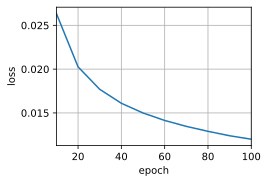

In [46]:
train(net, train_dataloader, lr, num_epochs, fr_vocab, device)

In [74]:
# 保存整个模型
torch.save(net, "data/eng2fr.pth")

In [33]:
#net = EncoderDecoder(encoder, decoder).to(device)
#net.load_state_dict(torch.load('data/eng2fr.pth'))
met = torch.load( "data/eng2fr.pth")

In [34]:
def truncate_pad(line, num_steps, padding_token):
    if len(line) > num_steps:
        return line[:num_steps]  # Truncate
    return line + [padding_token] * (num_steps - len(line))  # Pad

In [35]:
def predict(net, src_sentence, src_vocab, tgt_vocab, num_steps, device):
    net.eval()
    src_tokens = [src_vocab.w2i['<SOS>']] + [src_vocab.w2i[word] for word in src_sentence.lower().split()] + [src_vocab.w2i['<EOS>']]
    enc_valid_len = torch.tensor([len(src_tokens)], device=device)
    src_tokens = truncate_pad(src_tokens, num_steps, src_vocab.w2i['<EOS>'])
    enc_X = torch.unsqueeze(
        torch.tensor(src_tokens, dtype=torch.long, device=device), dim=0)
    enc_outputs = net.encoder(enc_X, enc_valid_len)
    dec_state = net.decoder.init_state(enc_outputs, enc_valid_len)
    dec_X = torch.unsqueeze(torch.tensor(
        [tgt_vocab.w2i['<SOS>']], dtype=torch.long, device=device), dim=0)
    output_seq = []
    for _ in range(num_steps):
        Y, dec_state = net.decoder(dec_X, dec_state)
        dec_X = Y.argmax(dim=2)
        pred = dec_X.unsqueeze(dim=0).type(torch.long).item()
        # if pred == tgt_vocab.w2i['<EOS>']:
        if pred == 0:
            break
        output_seq.append(pred) 
    res = [tgt_vocab.i2w[token] for token in output_seq]
    return ' '.join(res)

In [37]:
predict(net, "It was kind of you to invite us .", eng_vocab, fr_vocab, num_steps, device)

"l'étaient voile mourez .» prière 2 comprendrez m'endormis aideriez parfois 1940 troubles licenciée manquerai ardu sincères cobra cabane pouvons-nous promené vallée guichet exigea méchamment magnifique retournes-tu volcanique dangereuses tirant blondes gamin train-train universelle dortoir vallée guichet exigea lancer répondrai absents tombâmes planning artérielle remariée dédier observatrice intimidé l'instinct coûtent réaliste airlines suis-moi quelles n'empire d'obtenir j'attendis m'appelez-vous non-fumeur incohérent faites-le reconsidérer"